Basic import for Finance

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import talib
import matplotlib.pyplot as plt

In [2]:
symbal = "SBIN.NS"
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 8, 30)
price = yf.download(symbal, start = start_date, end = end_date, interval="1d")


[*********************100%***********************]  1 of 1 completed


 Preparing the dataset and adding some features

In [3]:
price['H-L'] = price['High'] - price['Low']
price['0-C'] = price['Close'] - price['Open']
price['3day MA'] = price['Close']. shift(1).rolling (window = 3).mean()
price['10day MA'] = price['Close'].shift (1). rolling (window= 10).mean()
price['30day MA'] = price['Close'].shift (1). rolling (window = 30).mean()
price['Std_dev']= price [ 'Close'].rolling (5).std()
price['RSI'] = talib.RSI(price['Close'].values, timeperiod = 9)
price['Williams %R'] = talib.WILLR(price['High'].values, price ['Low']. values, price['Close'].values, 7)
price['Price Rise'] = np.where(price [ 'Close'].shift(-1) > price['Close'], 1, 0)

In [4]:
price = price.dropna()

In [5]:
price
#price.to_csv(symbal+'.csv', index=True)
price.to_excel(symbal+'.xlsx')

Calculate 20-day Moving Average

In [6]:
ma_20 = price['Close'].rolling (window=20).mean()
#ma_20 = ma_20.dropna() #error while plotting

In [7]:
ma_20 

Date
2024-02-14           NaN
2024-02-15           NaN
2024-02-16           NaN
2024-02-19           NaN
2024-02-20           NaN
                 ...    
2024-08-23    827.527496
2024-08-26    825.157495
2024-08-27    822.372498
2024-08-28    819.202499
2024-08-29    816.307498
Name: Close, Length: 132, dtype: float64

#Plot the Moving Average and Price

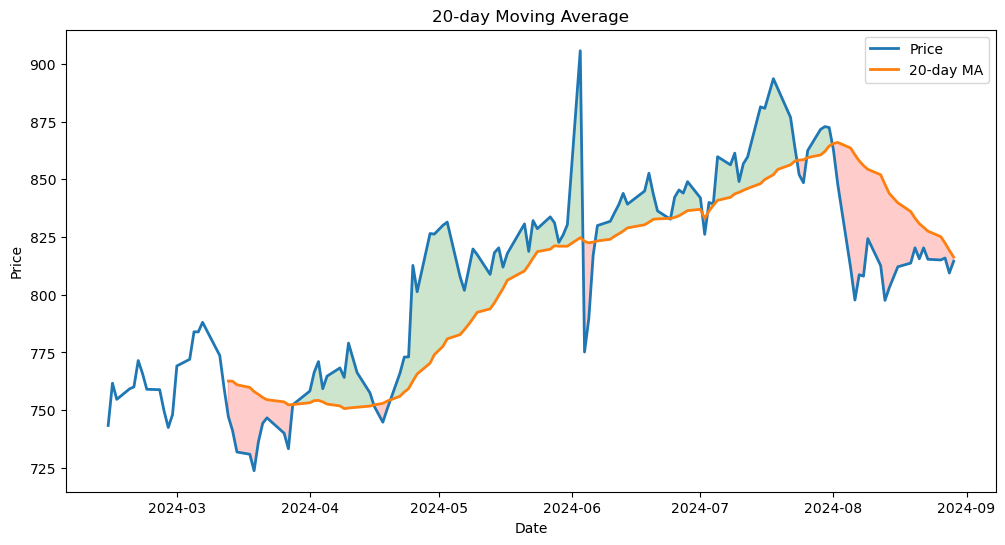

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(price.index, price['Close'], label='Price', linewidth=2)
ax.plot(ma_20.index, ma_20, label='20-day MA', linewidth=2)
ax.fill_between (price.index, price['Close'], ma_20, where=price['Close'] >= ma_20, interpolate=True, alpha=0.2, facecolor='green', edgecolor='green')
ax.fill_between (price.index, price['Close'], ma_20, where=price['Close'] < ma_20, interpolate=True, alpha=0.2, facecolor='red', edgecolor='red')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('20-day Moving Average')
plt.show()